<a href="https://colab.research.google.com/github/Jhonsilvaa/segmentacao-de-vinhos-com-machine-learning/blob/main/Segmenta%C3%A7%C3%A3o_de_Vinhos_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de Vinhos com Machine Learning
---
O vinho é uma das bebidas alcoólicas mais antigas e apreciadas do mundo. Estima-se que seja a quinta bebida mais consumida globalmente e a segunda entre as alcoólicas. É produzido a partir da fermentação natural do sumo da uva, um processo que dispensa a adição de açúcares, enzimas ou água. A popularidade do vinho é universal, com preços que variam amplamente dependendo da região de origem e da qualidade do produto, tornando-o acessível ou sofisticado para diversos públicos.

O vinho é mais do que uma bebida, é um produto cultural e econômico que reflete as características de sua região, do clima e das técnicas de produção.  Diante de um mercado globalizado e consumidores cada vez mais exigentes,  a indústria vinícola tem experimentado um avanço significativo impulsionado não apenas por técnicas aprimoradas de cultivo e produção, mas também pelo uso de dados.


<p align=center>
<img src="https://github.com/user-attachments/assets/0f451a73-b9dd-404d-9424-6acd37d6ba97" width="68%"></p>

Neste projeto, o nosso objetivo é desenvolver um modelo de machine learning para segmentar vinhos exclusivamente com base em suas propriedades químicas (acidez, pH, teor alcoólico e concentração de sulfatos).


## Descrição de Variáveis
Um guia que fornece descrições conceituais de cada variável em nosso conjunto de dados.




* `fixed acidity`: Refere-se aos ácidos não voláteis presentes no vinho, como ácido tartárico, málico e cítrico.
* `volatile acidity`: Mede os ácidos voláteis no vinho, principalmente o ácido acético, que é associado ao cheiro e sabor de vinagre.
* `citric acid`: Um ácido orgânico fraco encontrado em pequenas quantidades nas uvas.
* `residual sugar`: Quantidade de açúcar que permanece no vinho após a fermentação.
* `chlorides`: Representa o teor de sal no vinho.
* `free sulfur dioxide`: Quantidade de dióxido de enxofre disponível no vinho para proteger contra oxidação e contaminação microbiana.
* `total sulfur dioxide`: Inclui tanto o dióxido de enxofre livre quanto o combinado com outros compostos no vinho.
* `density`: Reflete a relação entre a massa e o volume do vinho.
* `pH`: Mede a acidez ativa do vinho.
* `sulphates`: São compostos que influenciam a percepção do corpo e sabor do vinho.
* `alcohol`: Representa o teor alcoólico do vinho, que contribui para o corpo e intensidade aromática.


## Importando os Dados

 A importação de dados é o processo de carregamento e leitura de dados em um notebook. Os aspectos que devem ser consideradas na importação de dados são formatos de dados e locais de armazenamento de arquivos de conjuntos de dados. Existem vários formatos de dados que podem ser importados para notebooks, como .csv, .xlsx, .json e assim por diante. Para locais de armazenamento, existem duas opções, nomeadamente a partir de um computador local ou da internet, por meio de um link. Uma importação adequada garante que os dados sejam lidos corretamente e estejam prontos para as etapas seguintes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich import print as rprint

Neste projeto, os dados utilizados foram obtidos do [Wine Quality Prediction](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data), disponibilizados pelo **Kaggle**.
<p align=center>
<img src="https://github.com/user-attachments/assets/17fa5bfd-a6a7-4c2e-ab1d-1524f49023ed" width="10%"></p>


Os dados abrangem um total de 338.436 Este conjunto dados é composto por  amostras de vinho verde tinto e branco, do norte de Portugal.

In [ ]:
from warnings import simplefilter, filterwarnings
simplefilter(action='ignore', category=FutureWarning)
filterwarnings("ignore", category=RuntimeWarning)
%matplotlib inline

In [ ]:
df_wines = pd.read_csv('/content/wines.csv')
df_wines.index = np.arange(1, len(df_wines)+1)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise exploratória de dados
Com os dados devidamente coletados, a próxima etapa é a análise exploratória de dados. Nessa etapa, empregamos diversas técnicas e ferramentas para entender melhor os dados coletados, identificando possíveis anomalias, relacionamentos e tendências nos dados.

* Antes de iniciar a análise dos dados, vamos verificar o nosso dataset, analisando as 5 primeiras entradas.

In [ ]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### **1. Qual é a natureza do conjunto de dados?**

Durante a etapa de análise exploratória de dados, o primeiro passo é a compreensão do conjunto de dados em questão, isto é, seu tamanho, a porcentagem de valores ausentes e os tipos de variáveis. O tamanho do conjunto serve para avaliar sua amplitude e, por consequência, sua complexidade. A porcentagem de dados ausentes serve como um parâmetro para medir a quantidade de informações faltantes em comparação ao total do conjunto de dados. Por sua vez, os tipos de variáveis revelam a natureza dos dados.

In [ ]:
table = Table(title='Informações das Variáveis')
table.add_column('Variable_name', justify='center')
table.add_column('Data_type', justify='center')
table.add_column('Unique_value', justify='center')
table.add_column('% of NaN', justify='center')
for column in df_wines.columns:
  table.add_row(f'{column}', f'{df_wines[column].dtypes}',
                f'{len(df_wines[column].unique())}',
                f'{np.divide(df_wines[column].isnull().sum(),len(df_wines))*100}')

print("Entradas:\t {}".format(df_wines.shape[0]))
print("Variáveis:\t {}\n".format(df_wines.shape[1]))
rprint(table)

Entradas:	 6497
Variáveis:	 11



                  Informações das Variáveis                   
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃    Variable_name     ┃ Data_type ┃ Unique_value ┃ % of NaN ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│    fixed acidity     │  float64  │     106      │   0.0    │
│   volatile acidity   │  float64  │     187      │   0.0    │
│     citric acid      │  float64  │      89      │   0.0    │
│    residual sugar    │  float64  │     316      │   0.0    │
│      chlorides       │  float64  │     214      │   0.0    │
│ free sulfur dioxide  │  float64  │     135      │   0.0    │
│ total sulfur dioxide │  float64  │     276      │   0.0    │
│       density        │  float64  │     998      │   0.0    │
│          pH          │  float64  │     108      │   0.0    │
│      sulphates       │  float64  │     111      │   0.0    │
│       alcohol        │  float64  │     111      │   0.0    │
└──────────────────────┴───────────┴──────────────┴──────────┘

* Podemos observar a distribuição dos tipos de dados e exibir os resultados em porcentagem.

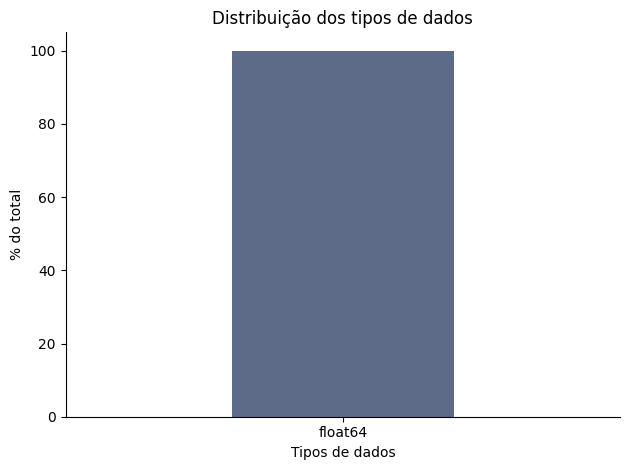

In [ ]:
fig, ax = plt.subplots()
filterwarnings('ignore')
data = (df_wines.dtypes.value_counts(normalize=True)*100).round(2)
sns.barplot(x=data.index.astype(str), y=data.values,color='#2E4372', width=0.4, alpha=0.8)
plt.title('Distribuição dos tipos de dados')
plt.xlabel('Tipos de dados')
plt.ylabel('% do total')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

Com base nas informações fornecidas, podemos observar que:

* É possível identificar que todos os dados no dataset são do tipo `Float64`.

* Não há valores ausentes no conjunto de dados.

* verificando o nosso dataset, percebemos que algumas linhas apresentam valores duplicados. Nesta etapa, realizaremos as correções necessárias para essa inconsistência.

In [ ]:
df_wines.drop_duplicates(keep='first', inplace=True)
df_wines.index = np.arange(1, len(df_wines)+1)
print("Entradas: {}\n".format(df_wines.shape[0]))
df_wines.head()

Entradas: 5318



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


### **2. Qual o tipo de distribuição das variáveis?**



Em um conjunto de dados é importante descrever o comportamento de como os valores estão distribuídos,
<br>usaremos o histograma para identificar a distribuição das variáveis numéricas.

In [ ]:
def custom_histplot(data, columns, colors, grid_shape=(2, 3), figsize=(14, 5), dpi=72):
    n_rows, n_cols = grid_shape
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = ax.flatten()

    for axis, column, color in zip(axes, columns, colors):
        sns.histplot(data=data, x=column, color=color, ax=axis, kde=True, bins='sturges')
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

    for remaining_ax in axes[len(columns):]:
        remaining_ax.set_visible(False)

    return plt.tight_layout()

A seguir, utilizamos a biblioteca Seaborn para gerar histogramas que permitem visualizar a distribuição das variáveis no dataset.

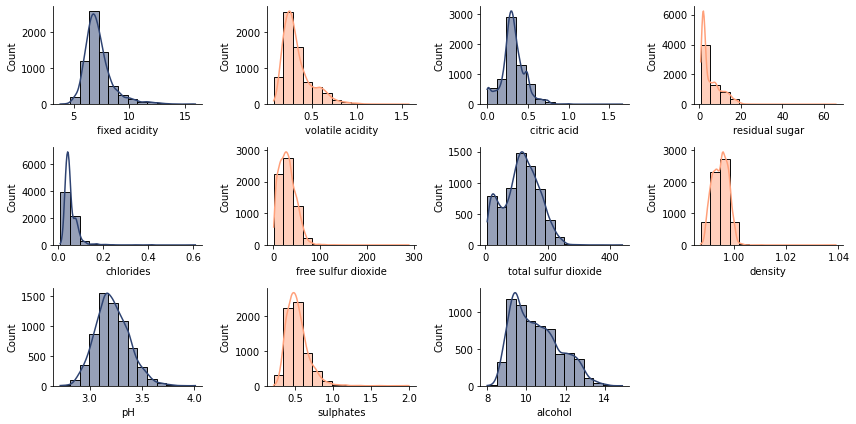

In [ ]:
custom_histplot(data=df_wines, columns=df_wines.columns.values,
                colors=['#2E4372', '#FFA07A']*11, grid_shape=(3, 4), figsize=(12, 6))

Com base nas informações fornecidas pelos histogramas, podemos observar que:

 * As variáveis como `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar` e `chlorides` conseguimos visualizar que possuem uma distribuição com uma assimetria a direita, ou seja, algumas características químicas dos vinhos se concentram em intervalos de valores mais baixos, enquanto que obtem alguns valores mais altos que  podem ser possiveis outliers.


 * Notamos que as variáveis `pH` e `alcohol` apresentam uma distribuição mais equilibrada e aproximadamente normal, demonstrando pouca variação em seus histogramas.








### **3. Há *outliers* presentes?**


Outliers, ou valores discrepantes, são observações que se distanciam significativamente do padrão geral dos dados. Eles podem resultar de erros de medição, variabilidade natural ou outras causas desconhecidas. Identificar e lidar com esses valores é essencial, pois podem influenciar negativamente a performance dos modelos preditivos e a precisão das análises estatísticas.

**<h4> Método do Intervalo Interquartil (IQR)</h4>**

O intervalo interquartil (IQR) mede a dispersão dos 50% centrais dos dados, calculado como a diferença entre o terceiro (Q3) e o primeiro quartil (Q1):

$$\text{IQR} = Q3 - Q1$$

Outliers são identificados pelos limites inferior e superior:

$$\text{Limite Inferior} = Q1 - 1.5 \times \text{IQR}$$
$$\text{Limite Superior} = Q3 + 1.5 \times \text{IQR}$$

Valores fora desse intervalo são outliers:
* Inferior: menor que o Limite Inferior.
* Superior: maior que o Limite Superior.







A seguir, criarei uma função chamada `detect_outliers_iqr` que utiliza o método do intervalo interquartil (IQR). Esta função será aplicada às variáveis numéricas do dataset.


In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = ((data < lower_bound) | (data > upper_bound))
    return n_outliers

aqui, irei aplicar a função `detect_outliers_iqr` e, em seguida, imprimir a quantidade de outliers encontrados em cada coluna

In [ ]:
for column in df_wines.columns.values:
    result = detect_outliers_iqr(df_wines[column].values)
    print(f'{column}: qtd de outliers - {result.sum()}')

fixed acidity: qtd de outliers - 304
volatile acidity: qtd de outliers - 279
citric acid: qtd de outliers - 143
residual sugar: qtd de outliers - 141
chlorides: qtd de outliers - 237
free sulfur dioxide: qtd de outliers - 44
total sulfur dioxide: qtd de outliers - 10
density: qtd de outliers - 3
pH: qtd de outliers - 49
sulphates: qtd de outliers - 163
alcohol: qtd de outliers - 1


Podemos constatar que todas as variaveis no dataset possuem outliers detectáveis pelo método do IQR.

A análise dos boxplots para as colunas numericas reforça essa hipótese. O boxplot utiliza os quartis e a amplitude interquartil (IQR) para determinar os limites além dos quais os dados são considerados outliers.

In [ ]:
def custom_boxplot(data, columns, colors, grid_shape=(2, 3), figsize=(14, 8), dpi=72):
    n_rows, n_cols = grid_shape
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize, dpi=dpi)
    axes = ax.flatten()

    for axis, column, color in zip(axes, columns, colors):
        sns.boxplot(data=data, x=column, color=color, ax=axis)
        axis.spines['right'].set_visible(False)
        axis.spines['top'].set_visible(False)

    for remaining_ax in axes[len(columns):]:
        remaining_ax.set_visible(False)

    return plt.tight_layout()

A seguir, utilizamos a biblioteca Seaborn para gerar boxplots que permitem visualizar presença de outliers das variáveis numéricas no dataset.

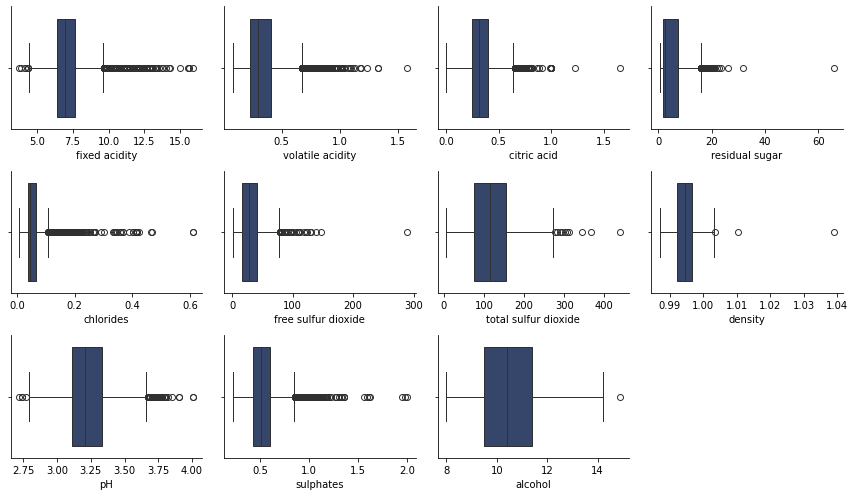

In [ ]:
custom_boxplot(data=df_wines, colors=['#2E4372']*11,
               columns=df_wines.columns.values,
               grid_shape=(3, 4),figsize=(12, 7))

Na etapa de pré-processamento, iremos aplicar um tratamento adequado aos  outliers e garantir que o modelo de machine learning não seja influenciado por eles.

### **4. Qual a correlação existente entre as variáveis?**

A correlação é uma medida que descreve a direção e a intensidade da relação entre duas ou mais variáveis. Para determinar as correlações existentes entre as variáveis de interesse, é comum gerar uma matriz de correlação. Essa matriz é composta por coeficientes de correlação que indicam a força e a direção da relação entre cada par de variáveis.

* Para analisar as relações entre as variáveis numéricas do dataset, podemos utilizar a matriz de correlação. No código abaixo, calculamos a matriz de correlação das colunas numéricas e visualizamos esta matriz usando um heatmap.

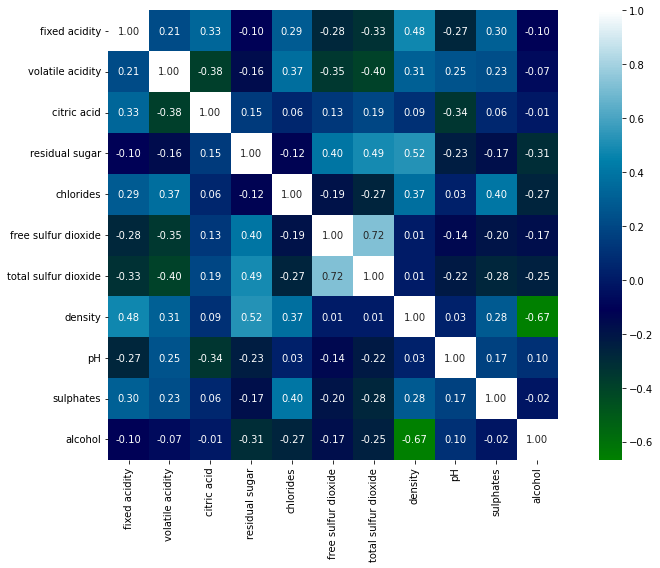

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=72)
corr = df_wines.corr()
sns.heatmap(corr, cmap='ocean', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax);
plt.tight_layout()

Segundo as informações fornecidas pela matriz de correlação, podemos denotar os seguintes aspectos:

* Observamos que a correlação positiva mais forte na matriz (0,72) é entre `free sulfur dioxide` e `dióxido de enxofre total`. Podemos assumir que esta relação é até esperada uma vez que o dióxido de enxofre livre é a parte ativa do dióxido de enxofre total.

* A variável `density` apresenta correlações muito interessantes com outras variáveis. Primeiramente, destacamos aqui a correlação positiva moderada com a variável `residual sugar` (0,52). Uma explicação científica para a interação entre estas duas variáveis ​​pode ser explicada da seguinte forma: Quando um sólido (como o açúcar) se dissolve num líquido (como a água), aumenta a densidade global do líquido. esse fenomeno acontece porque as moléculas de açúcar ocupam o espaço entre as moléculas de água, aumentando efetivamente a massa dentro do mesmo volume. Quanto maior a concentração de açúcar dissolvido no suco da uva, mais denso ele é. Outra interação interessante é com a variável `álcool` (-0,67). Esta relação inversa, ou negativa, entre variáveis ​​também pode ser explicada em termos de enologia. O teor alcoólico do vinho é a porcentagem de etanol na bebida. À medida que o teor alcoólico aumenta, a proporção de agua diminuiu. devido a esse aspecto é que existe uma  redução da densidade geral do vinho.

##  Pré-processamento de dados

Com base nos resultados da análise exploratória, podemos direcionar nossos esforços para o pré-processamento dos dados. Essa etapa inclui uma série de atividades que têm como objetivo preparar os dados para modelagem, tornando-os mais adequados para uso em modelos e algoritmos. As atividades que realizamos podem incluir limpeza dos dados, Tratamento de outliers, normalização, codificação de variáveis e inclui a divisão dos dados em conjuntos de treinamento e teste, isto quando houver, e entre outros.


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

### **Padronização de dados - Robust Scaler**

A padronização de dados consiste na transformação de variáveis numéricas para uma escala comum. O objetivo é normalizar as escalas das variáveis, evitando que qualquer uma delas exerça influência excessiva sobre os modelos.

O Robust Scaler é uma técnica de padronização de dados que é menos sensível a outliers do que o tradicional Standard Scaler. Enquanto o Standard Scaler utiliza a média e o desvio padrão para realizar a padronização, o Robust Scaler usa a mediana e o intervalo interquartil (IQR) para realizar essa tarefa.


In [ ]:
scaler = RobustScaler()
df_wines_scaler = scaler.fit_transform(df_wines.copy())
df_wines_scaler =  pd.DataFrame(df_wines_scaler, columns=df_wines.columns.copy())

### **Redução de Dimensionalidade - Principal Component Analysis (PCA)**

A redução de dimensionalidade é um método para representar um conjunto de dados usando um número menor de funcionalidades (ou seja, dimensões) enquanto ainda captura as propriedades essenciais dos dados originais. Isso equivale à remoção de funcionalidades irrelevantes, redundantes ou simplesmente ruidosas, criando um modelo com menos variáveis.

Principal Component Analysis (PCA) é, possivelmente, o método de redução de dimensionalidade mais comum. Trata-se de uma forma de extração de funcionalidades, o que significa que combina e transforma as funcionalidades originais do conjunto de dados para produzir novas características, chamadas componentes principais. Essencialmente, o PCA seleciona um subconjunto de variáveis de um modelo que, juntas, capturam a maior parte ou toda a variância presente no conjunto original de variáveis. O PCA então projeta os dados em um novo espaço definido por esse subconjunto de variáveis.

In [ ]:
pca = PCA(n_components=2, random_state=0)
df_wines_pca = pca.fit_transform(df_wines_scaler.copy())
explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Score: {explained_variance_ratio}")

Score: 0.5117683680484203


Com os dados devidamente transformados e sem a necessidade de ajustes adicionais, é possível iniciar a modelagem de Machine Learning.

##  Modelagem de Machine Learning

Depois do pré-processamento de dados, o próximo passo é a criação do modelo. Isso envolve a escolha dos algoritmos de Machine learning mais adequado para o problema e a definição dos parâmetros dos modelos.

In [ ]:
!pip install kneed
!pip install optuna
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import optuna

### **K-Means**

O algoritmo K-means é uma técnica de machine learning não supervisionado, Ele particiona um conjunto de $( n )$ observações em $( K )$ clusters $( K \leq n )$, onde cada observação pertence ao cluster com o centróide mais próximo, com base na distância euclidiana. É usado em segmentação de mercado, compressão de imagens e mais.

O objetivo do K-means é minimizar a soma dos quadrados das distâncias intra-cluster, conhecida como Within-Cluster Sum of Squares (WCSS) definida como:

$$[ J = \sum_{i=1}^{K} \sum_{x \in C_i} | x - \mu_i |^2 ]$$

Onde:

* $K$ : número de clusters.

* $C_i$: conjunto de pontos no cluster ( i ).

* $x$: ponto de dado.
* $\mu_i$: centróide do cluster $( i )$.



Para determinar um número adequado de agrupamentos, empregaremos o **Elbow method**. Esta tecnica é usada para determinar o número ideal de clusters (K) em um algoritmo de agrupamento K-Means. Ele examina a relação entre o número de clusters e a soma dos quadrados dentro do cluster (WCSS), uma medida da variância dentro de cada cluster. A seguir, calcularemos a inércia para um intervalo de clusters de 2 a 10. O objetivo é identificar o ponto de inflexão na curva de inércia.

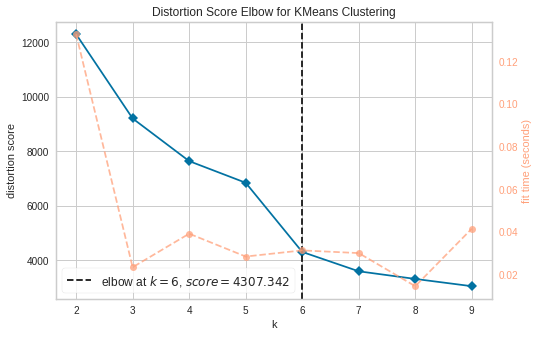

In [ ]:
fig, ax = plt.subplots(figsize=(7.8, 5), dpi=72)
kelbow_visualizer = KElbowVisualizer(KMeans(random_state=0),k=(2,10),timings=True, ax=ax)
kelbow_visualizer.timing_color = '#FFA07A'
kelbow_visualizer.fit(df_wines_pca)
kelbow_visualizer.show()
plt.show()

Com base no `Elbow method`, o gráfico mostra que o número ótimo de clusters para o `KMeans` é provavelmente 6 com distorção de 4307.342.  a partir desse valor, observamos que  adicionar mais clusters não traz redução significativa na distorção.

O `Elbow method` não é o unico método capaz de determinar o número clusters $(k)$, existem outras técnicas que são consideradas robustas que complementam ou substituem essa abordagem, entre os métodos mais relevantes destacam-se:

* `Silhouette Score` : Mede o quão bem cada ponto está agrupado em seu cluster em comparação com outros clusters. Varia de -1 a 1, sendo valores mais altos melhores (clusters bem definidos).

* `Calinski–Harabasz`: Também conhecido como Variance Ratio Criterion (VRC), este índice compara a dispersão entre clusters (between-cluster dispersion) com a dispersão dentro dos clusters (within-cluster dispersion).

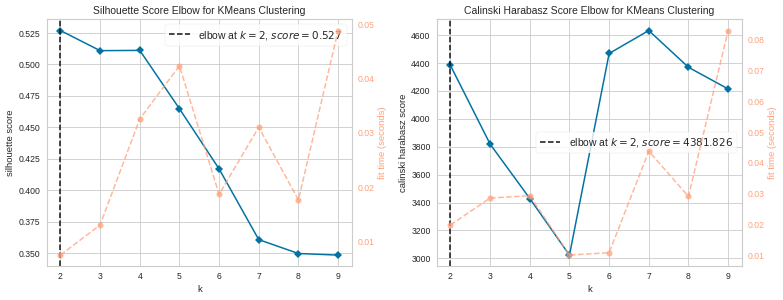

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 5), dpi=62)
kelbow_sil = KElbowVisualizer(KMeans(random_state=0),k=(2, 10),
                              metric='silhouette', ax=ax[0])
kelbow_sil.timing_color = '#FFA07A'
kelbow_sil.fit(df_wines_pca)
kelbow_sil.finalize()
kelbow_ch = KElbowVisualizer(KMeans(random_state=0),k=(2, 10),
                             metric='calinski_harabasz',ax=ax[1])
kelbow_ch.timing_color = '#FFA07A'
kelbow_ch.fit(df_wines_pca)
kelbow_ch.finalize()
plt.tight_layout()

Embora o `Elbow method` sugira $k=6$, as métricas `Silhouette Score` e o `Calinski Harabasz` que avaliam tanto a coesão quanto a separação, sugerem que $k=2$ ser mais apropriado, denotando que os clusters são bem definidos nesse valor.

Podemos complementar e validar as recomedaçoes das metricas(Silhouette score e Calinski Harabasz) recorrendo ao `SilhouetteVisualizer` combinado a distribuições dos clusters. O `SilhouetteVisualizer` exibe o coeficiente de Silhouette para cada amostra por cluster, visualizando quais clusters são densos e quais não são. Esta visualização pode nos ajudar para determinar o desequilíbrio do cluster ou para selecionar um valor de $k$
comparando vários visualizadores.


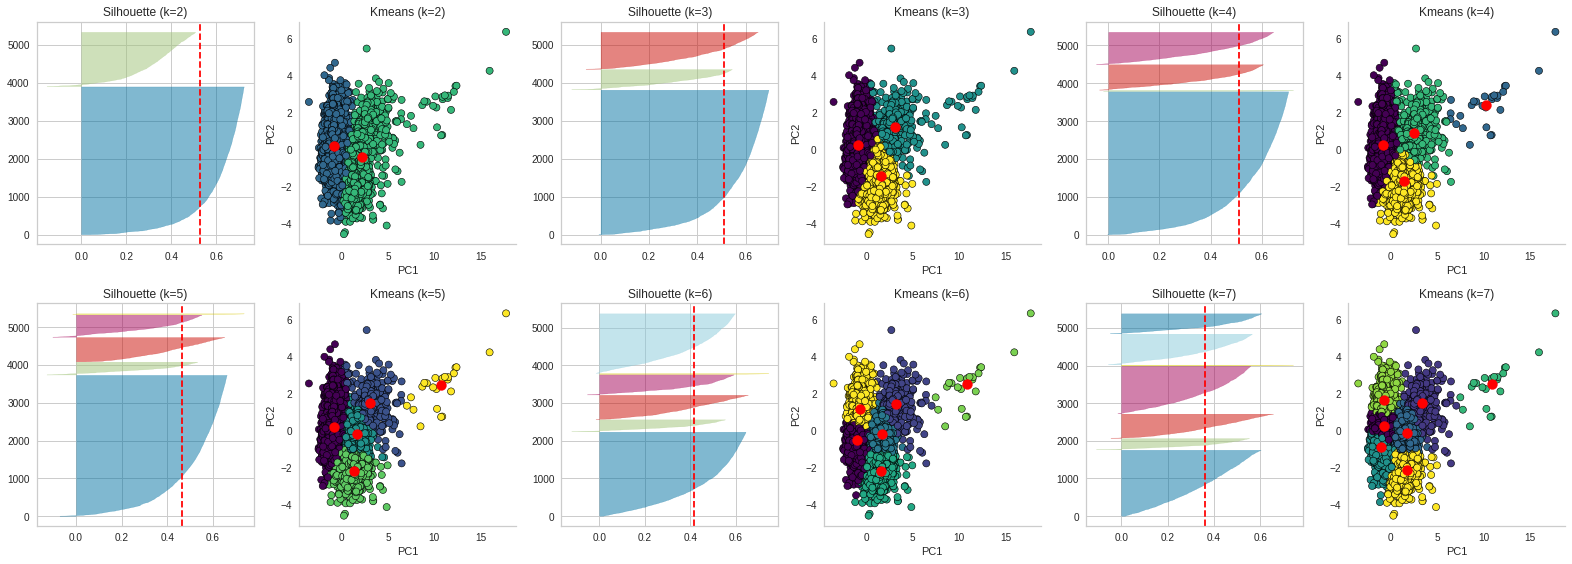

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(22, 8), dpi=72)
for idx, k in enumerate(np.arange(2, 8)):
    row, col = divmod(idx, 3)
    col0, col1 = col * 2, col * 2 + 1
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df_wines_pca)
    silhoutte_visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=axes[row, col0])
    silhoutte_visualizer.fit(df_wines_pca)
    axes[row, col0].set_title(f"Silhouette (k={k})")
    ax_sc = axes[row, col1]
    sns.scatterplot(x=df_wines_pca[:, 0], y=df_wines_pca[:, 1], hue=labels,
                    palette="viridis", s=50, edgecolor="black", ax=ax_sc, legend=False)
    ax_sc.scatter(*kmeans.cluster_centers_.T, c='red', marker='o', s=100, label='Centroids')
    ax_sc.set(title=f"Kmeans (k={k})", xlabel="PC1", ylabel="PC2")
    ax_sc.spines[['right', 'top']].set_visible(False)
    ax_sc.grid(False)
plt.tight_layout()

* Verificando o  grafico acima, observamos que quando $K=2$ temos um
alto valor médio de silhueta, os clusters aparentam ser bem separados e volumosos. A medida que o valor de $K$ vai aumentando, o valor médio da silhueta vai diminuido e consequetemente os clusters vão ficando mais numerosos e menores, devido a esse comportamento demonstrado no grafico, optamos pelo valor de $K$ igual a dois para o `Kmeans`.

### **Hierarchical Clustering(Agglomerative)**

 é uma técnica de clustering que constrói uma hierarquia de clusters seguindo uma estratégia `bottom-up` (de baixo para cima). O processo inicia com cada observação ou ponto de dados tratado como um cluster individual. A cada passo, os pares de clusters mais próximos ou similares são identificados e combinados sucessivamente, reduzindo gradualmente o número de grupos. Essa fusão progressiva continua até que todos os dados sejam aglutinados em um único cluster abrangente, formando uma estrutura hierárquica que captura relações de proximidade em diferentes níveis.

A seguir, criaremos dendrogramas, diagramas em formato de árvore que demonstram, de baixo para cima, a união de observações ou pequenos grupos em graus crescentes de dissimilaridade, para demonstrar como os métodos de linkage(`ward`, `single`, `complete` e `average`) influenciam no numero e a  formação dos clusters. É importante ressaltar que não estamos utilizando nenhum tipo de otimização nesse momento.

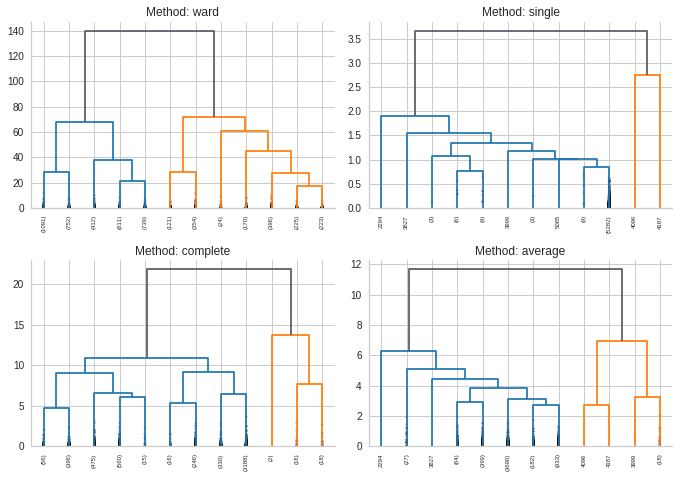

In [ ]:
def colors(link_id):
    c1, c2 = Z[link_id - len(df_wines_scaler), :2]
    cor1 = ('#1f77b4' if clusters[int(c1)] == 1 else '#ff7f0e') if c1 < len(df_wines_scaler) else colors(int(c1))
    cor2 = ('#1f77b4' if clusters[int(c2)] == 1 else '#ff7f0e') if c2 < len(df_wines_scaler) else colors(int(c2))
    return cor1 if cor1 == cor2 else '#5A5A66'

fig, axes = plt.subplots(2, 2, figsize=(9.6, 6.8), dpi=72)
for ax, method in zip(axes.flatten(), ['ward', 'single', 'complete', 'average']):
    Z = linkage(df_wines_pca, method=method)
    clusters = fcluster(Z, t=2, criterion='maxclust')
    dendrogram(Z, leaf_rotation=90, leaf_font_size=10,show_contracted=True,
           truncate_mode='lastp', p=12, link_color_func=colors, ax=ax)
    ax.set_title(f'Method: {method}', fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=6)
plt.tight_layout()

* Analisando os quatro métodos parece que a divisão mais adequada esta entorno de 2 ou 3 clusters.



Aqui, iremos usar a biblioteca `Optuna` para encontrar automaticamente as melhores combinações de três hiperparâmetros(`n_clusters`, `metric` e `linkage`) do `AgglomerativeClustering`. Para isso, foi criada uma função `objective`, que define o seguinte espaço de busca:

* `n_clusters`: entre 2 e 10.
* `metric`:  euclidean, manhattan e cosine
* `linkage`:ward, complete, average e single

para avaliar a qualidade dos clusters gerados, utilizaremos como métrica `Silhouette Score`.


In [ ]:
def objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 2, 10)
    linkage = trial.suggest_categorical("linkage", ["ward", "complete", "average", "single"])
    metric = "euclidean" if linkage == "ward" else trial.suggest_categorical("metric",
                                                     ["euclidean", "manhattan", "cosine"])
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage,
                                   metric=metric)
    labels = model.fit_predict(df_wines_pca)
    score = silhouette_score(df_wines_pca, labels)
    return score

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=300)
print("Best parameters:", study.best_params)
print("Best silhouette score:", study.best_value)

Best parameters: {'n_clusters': 2, 'linkage': 'single', 'metric': 'manhattan'}
Best silhouette score: 0.860464307639196


* A otimização revelou que os hiperparâmetros selecionados com `n_clusters` igual a **2**, `linkage` do tipo **single** e `metric` igual a **manhattan**, alcançaram um Silhouette Score de aproximadamente **0.8604**.



aqui, podemos visualizar a distribuição dos clusters com os valores gerados pela otimização `Optuna`,  a fim de termos uma noção de como os clusters estão separados.

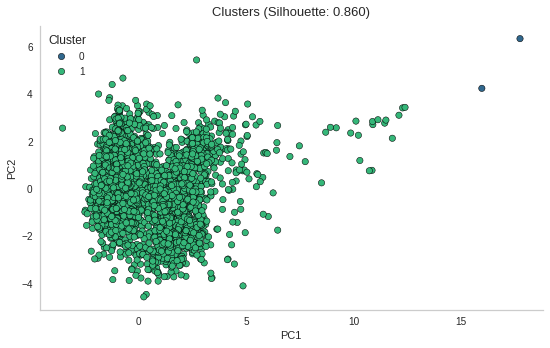

In [ ]:
fig, ax = plt.subplots(figsize=(7.8, 5), dpi=72)
agg = AgglomerativeClustering(n_clusters=2, metric='manhattan', linkage='single')
labels = agg.fit_predict(df_wines_pca)
sil_score = silhouette_score(df_wines_pca, labels)
sns.scatterplot(x=df_wines_pca[:, 0], y=df_wines_pca[:, 1],
                hue=labels, palette="viridis", s=40,
                edgecolor="black", ax=ax)
ax.set_title(f"", fontsize=13, pad=10)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.set_title(f"Clusters (Silhouette: {sil_score:.3f})", fontsize=13, pad=10)
ax.legend(title="Cluster")
plt.tight_layout()
plt.show()

Considerando o aspecto visual, observa-se que existe uma divisão entorno de dois clusters, o cluster 0 obtem a maioria dos pontos em constrate do cluster 1 que aparenta corresponder apenas dois pontos, que estão afastados do grupo principal. Olhando para valor do coeficiente de silhueta de 0.86, reforça essa percepção, conseguimos observa que os  clusters estão bem separados e agrupados internamente.


### **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

é um algoritmo de clustering que agrupa pontos compactados em regiões de alta densidade e separa pontos localizados em regiões de baixa densidade. O algoritmo define clustering como regiões contínuas de pontos de alta densidade, separadas por regiões de baixa densidade. O DBSCAN não exige que o número de clustering seja especificado previamente e pode identificar clustering de formato arbitrário. O algoritmo DBSCAN funciona definindo dois parâmetros: `épsilon` $(ε)$ e `minPts`(pontos mínimos). O $ε$ determina o raio da vizinhança ao redor de cada ponto, enquanto minPts especifica o número mínimo de pontos necessários para formar uma região densa.

Como observamos, a efetividade do `DBSCAN` está fortemente associada à seleção de seus dois parâmetros fundamentais: épsilon(ε) e MinPts. Algumas técnicas e boas práticas têm sido sugeridas pela literatura e artigos para ajudar na determinação de valores apropriados. Abaixo estão algumas regras básicas baseadas em pesquisas para determinar o valor de `MinPts`:

* `MinPts` deve ser maior ou igual à dimensionalidade do conjunto de dados.
* Para dados bidimensionais, use o valor padrão do DBSCAN de `MinPts` = 4 (Ester et al., 1996)
* Se seus dados tiverem mais de 2 dimensões, escolha `MinPts` = 2*dim, onde dim = as dimensões do seu conjunto de dados (Sander et al., 1998).



Agora que estabelecemos os critérios para a escolha do valor de `MinPts`, podemos avançar para a determinação do parâmetro épsilon (ε). Uma das técnicas  para definir automaticamente o valor ideal de ε é o gráfico `k-Distance Plot`. Nesse método, calcula-se, para cada ponto, a distância até seu k-ésimo vizinho mais próximo, onde k corresponde ao valor de `MinPts` previamente definido. O nosso objetivo encontrar o valor ideal para ε no ponto de curvatura máxima (ou seja, onde o gráfico tem a maior inclinação).

Para facilitar essa busca no gráfico de distâncias, podemos recorrer ao `KneeLocator`, uma implementação que automatiza a detecção desse ponto de curvatura.



Optimal epsilon: 0.6240240728523352



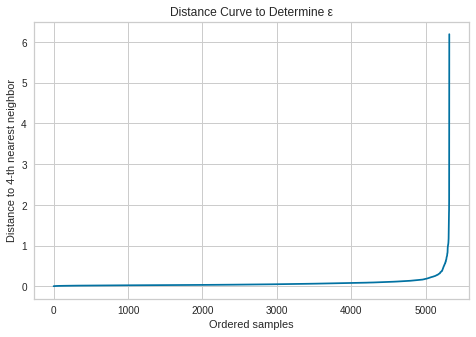

In [ ]:
fig, ax = plt.subplots(figsize=(7.8, 5), dpi=72)
k = 2*df_wines_pca.shape[1]
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df_wines_pca)
distances, _ = neigh.kneighbors(df_wines_pca)
distances = np.sort(distances[:, k-1])
kl = KneeLocator(x=range(len(distances)),y=distances,
                 curve='convex', direction='increasing')
optimal_eps = distances[kl.knee]
print(f'Optimal epsilon: {optimal_eps}\n')
ax.plot(distances)
ax.set_xlabel('Ordered samples')
ax.set_ylabel(f'Distance to {k}-th nearest neighbor')
ax.set_title('Distance Curve to Determine ε')
plt.show()

* A partir do resultado do  `k‑Distance Plot` combinado com o `KneeLocator`, revelou que o valor de ε(0,624) corresponde ao ponto de curvatura máxima da curva de distâncias.





A seguir, faremos uma comparação do DBSCAN utilizando quatro métricas de distância Euclidiana, Manhattan, Chebyshev e Minkowski, mantendo fixos o valor de ε (0,624) e o MinPts. Para avaliar a qualidade dos agrupamentos, usaremos o  `silhouette_score` e em seguida, analisaremos a distribuição resultante de cada cluster. A Nossa intenção é comparar, tanto visualmente quanto numericamente, qual métrica gera clusters mais coesos e melhor separados.

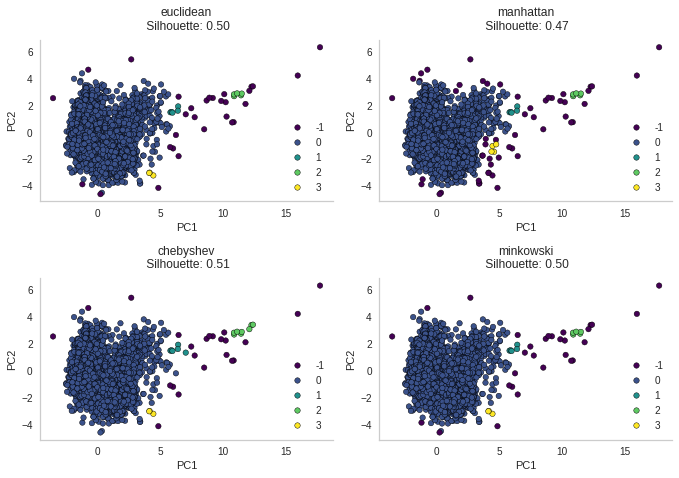

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(9.6, 6.8), dpi=72)
for ax, metric in zip(axes.flatten(), ['euclidean', 'manhattan', 'chebyshev', 'minkowski']):
    if metric == 'minkowski':
        dbscan = DBSCAN(eps=0.6240240728523352, min_samples=k, metric=metric, p=2)
        labels = dbscan.fit_predict(df_wines_pca)
    else:
      dbscan = DBSCAN(eps=0.6240240728523352, min_samples=k, metric=metric)
      labels = dbscan.fit_predict(df_wines_pca)

    sns.scatterplot(x=df_wines_pca[:, 0], y=df_wines_pca[:, 1],
                      hue=labels, palette="viridis", s=30,
                      edgecolor="black", ax=ax)
    sil_score = silhouette_score(df_wines_pca, labels)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title(f"{metric}\n Silhouette: {sil_score:.2f}", fontsize=12, pad=10)
    ax.grid(False)
plt.tight_layout()

* Com base na visualização dos graficos acima, o primeiro ponto a ressalvar é que a primeira vista conseguimos indentificar que o  desempenho do DBSCAN demonstra um comportamento de  variação conforme a métrica vai mudando. Quando analisamos em  particular, a métrica `Chebyshev` é possivel ver que ela se sobressai das demais devido ao seu `Silhouette Score` de **0,51**.




Apesar das técnicas anteriores (k-Distance Plot e KneeLocator) serem frequentemente utilizadas para encontrar os valores adequados para os parâmetros do DBSCAN, não são as únicas opções disponíveis. utilizando a biblioteca `Optuna` procuramos identificar as melhores combinações de valores mais eficazes de três hiperparâmetros já previamente conhecidos `eps`, `min_samples` e `metric`. Para isso, foi criada uma função `objective`, que define o seguinte espaço de busca:

* `eps`: entre 0.01 e 10.0.
* `min_samples`: entre 2 e 20.
* `metric`: Euclidean, Manhattan, Chebyshev e Cosine.

Por fim, para avaliar a qualidade dos clusters gerados, utilizaremos o `Silhouette Score`.

In [ ]:
def objective(trial):
    epsilon = trial.suggest_float('epsilon', 0.01, 10.0)
    min_samples = trial.suggest_int('min_samples', 2, 20)
    metric = trial.suggest_categorical('metric', ["euclidean" , "manhattan",
                                                  "chebyshev", "cosine"])
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(df_wines_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return -1
    score = silhouette_score(df_wines_pca, labels)
    return score

optuna.logging.set_verbosity(optuna.logging.INFO)
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=300)
print("Best parameters:", study.best_params)
print("Best silhouette score:", study.best_value)

Best parameters: {'epsilon': 1.9487800470541092, 'min_samples': 11, 'metric': 'euclidean'}
Best silhouette score: 0.7865154032612386


* A otimização revelou que os hiperparâmetros selecionados com `eps` de  1.94, `min_samples` de **11** e `metric` igual a **euclidean** — alcançaram um `Silhouette Score` de aproximadamente **0.786**.

Para fins comparativos, faremos um contraste entre os dois métodos(KneeLocator e Optuna) mantendo o `Silhouette Score` como métrica de avaliação e exibindo a distribuição dos clusters gerados por cada abordagem.


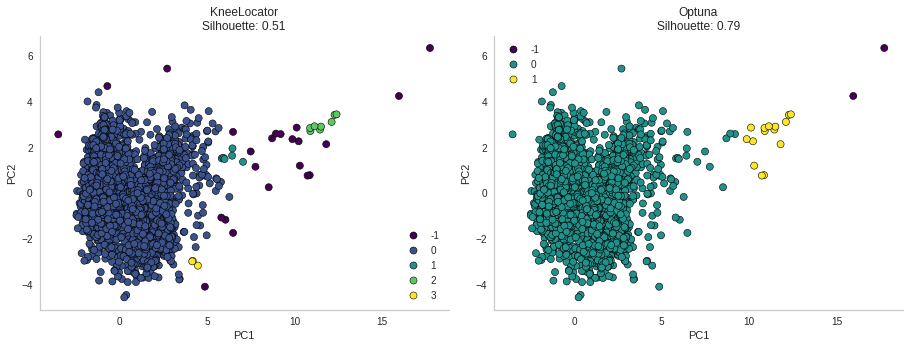

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 5), dpi=72)
methods = [{'eps': 0.6240240728523352, 'min_samples': k,
            'title': 'KneeLocator','metric': 'chebyshev'},
           {'eps': 1.9487800470541092, 'min_samples': 11,
            'title': 'Optuna', 'metric': 'euclidean'}]
for ax, method in zip(axes, methods):
    dbscan = DBSCAN(eps=method['eps'],
                    min_samples=method['min_samples'],
                    metric=method['metric'])
    labels = dbscan.fit_predict(df_wines_pca)
    sil_score = silhouette_score(df_wines_pca, labels)
    scatter = sns.scatterplot(x=df_wines_pca[:, 0], y=df_wines_pca[:, 1],
                             hue=labels, palette="viridis", s=50,
                             edgecolor="black", ax=ax)
    ax.set_title(f"{method['title']}\nSilhouette: {sil_score:.2f}", fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.grid(False)
plt.tight_layout()

Comparando os dois métodos do ponto de vista visual, o método `optuna` transparece ter uma estrutura de cluster bem mais estavel e menos ruidosa, quando avaliamos pela métrica `Silhouette Score` o método `optuna` ainda demonstra uma vantagem em termos de qualidade do clustering com 0.79.



## Avaliar o desempenho do modelo
A avaliação é a etapa onde testamos se nosso modelo é capaz de cumprir a missão que foi definida para ele. É nessa fase que utilizamos diferentes métricas e técnicas para avaliar a eficácia do modelo.

In [ ]:
!pip install great_tables
from great_tables import GT, style, loc
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

Agora que já passamos por todo processo de  exploração dos dados, pré-processamento e ajustamos os hiperparâmetros dos algoritmos, vamos comparar o desempenho entre eles com o objetivo de identificar o modelo de clustering que melhor se adapta à estrutura dos nossos dados. Para isso, utilizaremos três métricas de avaliação, sendo que duas delas já vimos anteriormente:

* `Silhouette Score`: Mede a coesão e separação dos clusters.
* `Calinski-Harabasz Score`: Avalia a dispersão entre e dentro dos clusters.
* `Davies-Bouldin Score`: Compara a similaridade entre clusters.

In [ ]:
models = [KMeans(2, random_state=0),AgglomerativeClustering(n_clusters=2, linkage='single', metric='manhattan'),
          DBSCAN(eps=1.9487800470541092, min_samples=11, metric='euclidean')]
metrics = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
results = {metric.__name__: [float(metric(df_wines_pca, model.fit_predict(df_wines_pca))) for model in models]
           for metric in metrics}
df_results = pd.DataFrame(results)
df_results.insert(0, 'Models', [model.__class__.__name__ for model in models])
table = GT(df_results).tab_header(title="Clustering Models Performance").cols_align(align="center")
table.tab_style(style=style.text(align="center"), locations=loc.body())

GT(_tbl_data=                    Models  silhouette_score  calinski_harabasz_score  \
0                   KMeans          0.527030              4381.826341   
1  AgglomerativeClustering          0.860464               152.090812   
2                   DBSCAN          0.786515               343.740332   

   davies_bouldin_score  
0              0.877514  
1              0.173872  
2              0.330068  , _body=<great_tables._gt_data.Body object at 0x7a9e55ae0590>, _boxhead=Boxhead([ColInfo(var='Models', type=<ColInfoTypeEnum.default: 1>, column_label='Models', column_align='center', column_width=None), ColInfo(var='silhouette_score', type=<ColInfoTypeEnum.default: 1>, column_label='silhouette_score', column_align='center', column_width=None), ColInfo(var='calinski_harabasz_score', type=<ColInfoTypeEnum.default: 1>, column_label='calinski_harabasz_score', column_align='center', column_width=None), ColInfo(var='davies_bouldin_score', type=<ColInfoTypeEnum.default: 1>, column_label='davies_bouldin_score', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7a9e55d97c10>, _spanners=Spanners([]), _heading=Heading(title='Clustering Models Performance', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Models', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Models', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='Models', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='silhouette_score', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='silhouette_score', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='silhouette_score', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='calinski_harabasz_score', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='calinski_harabasz_score', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=None, rows=None, mask=None), grpname=None, colname='calinski_harabasz_score', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align='center', v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=No

Olhando para nossa tabela acima, destacamos os seguintes pontos:

* O modelo `AgglomerativeClustering` foi o nosso melhor modelo, sendo o superior nas métricas `Silhouette Score`(Quanto mais próximo de 1, melhor) e `Davies-Bouldin Score`(Quanto mais próximo de 0, melhor).

* Já o modelo `DBSCAN` obteve bons resultados,  em sua maior parte considerados equilibrados ou consistentes, mesmo que não tenha sido o melhor em nenhum.

* Por fim, o modelo `Kmeans` foi evidentemente o melhor na métrica `	calinski_harabasz_score`, mas deixou a desejar nas outras métricas, sendo o pior modelo.
